C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


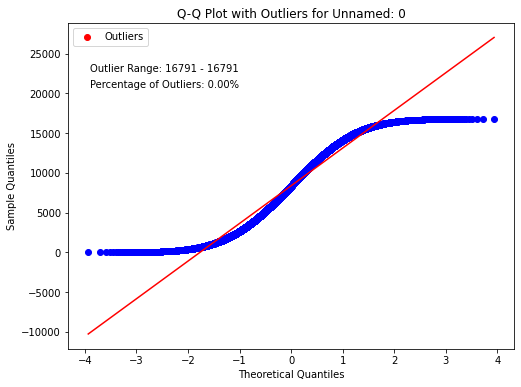

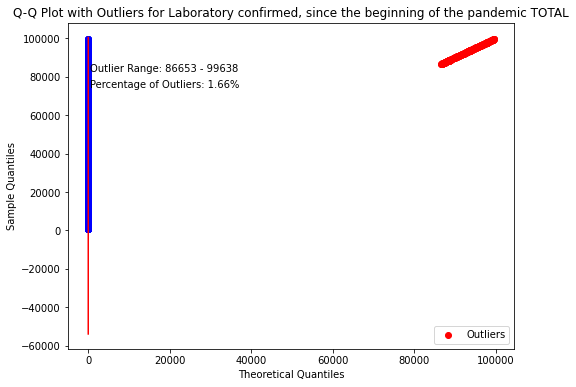

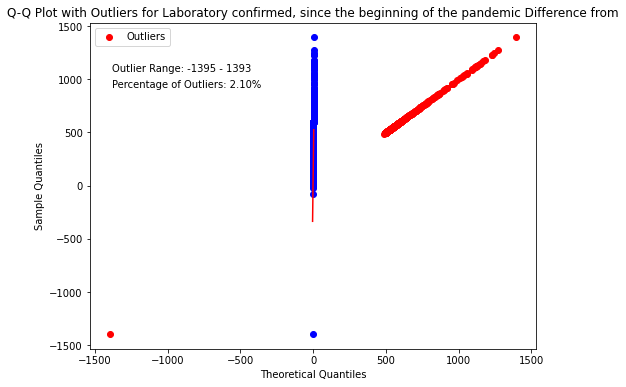

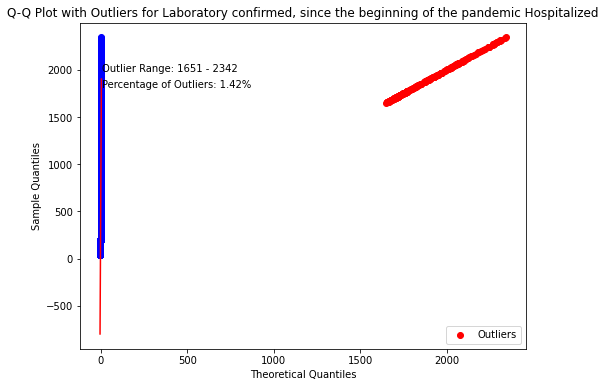

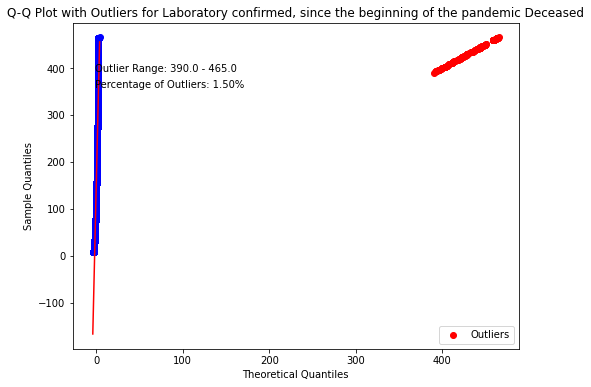

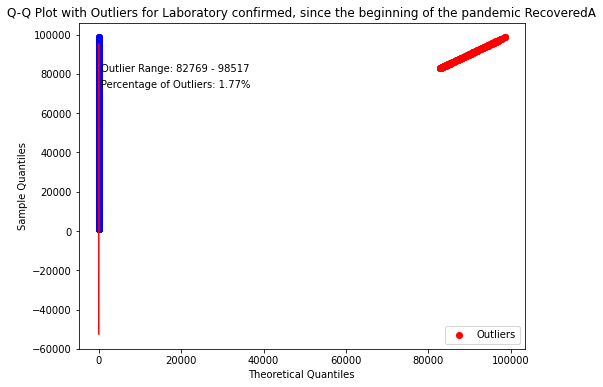

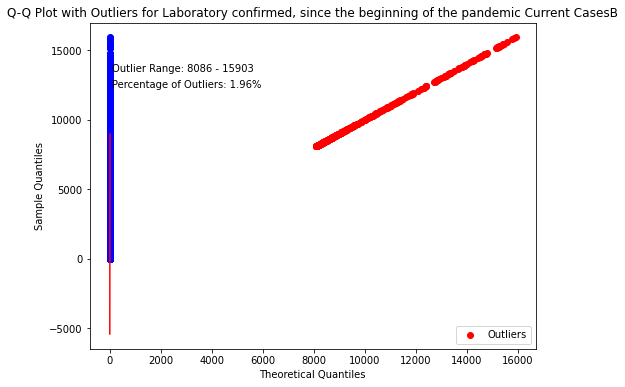

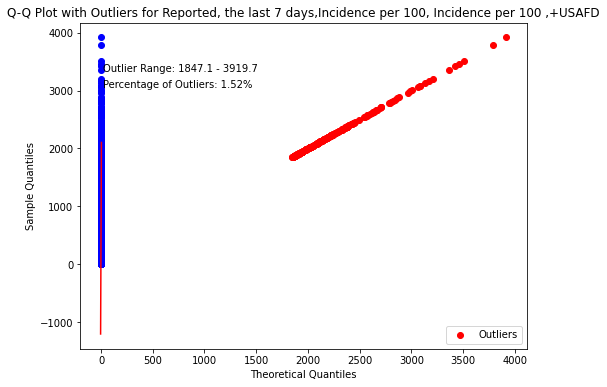

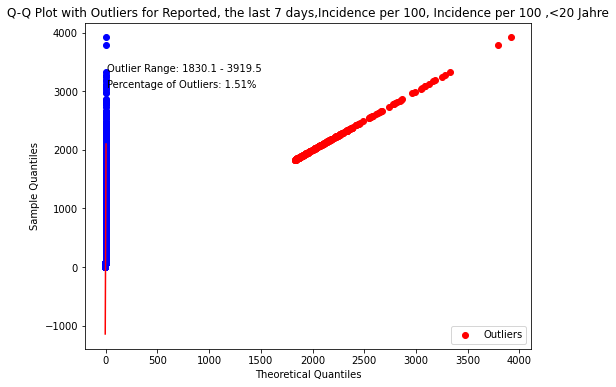

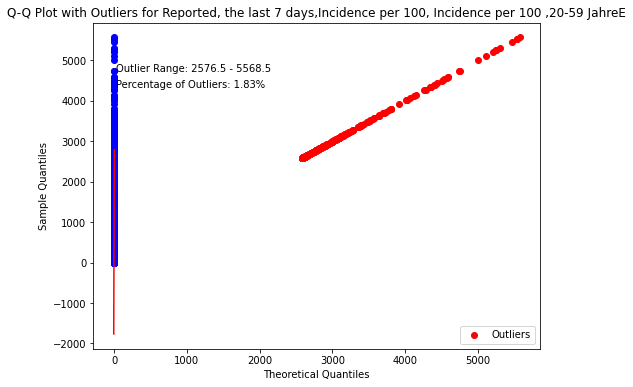

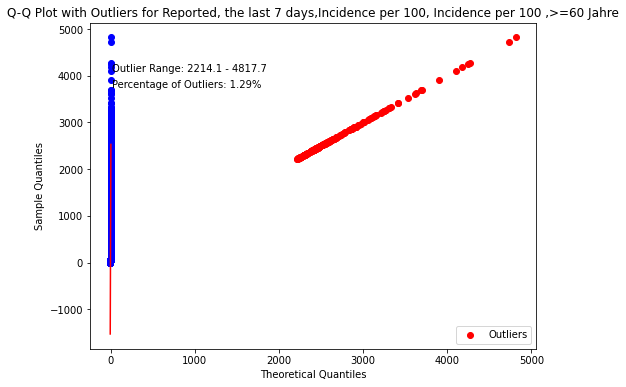

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Read the Excel file
df = pd.read_excel(r'final_cleaned_dataset.xlsx')

# Select the columns of interest (numeric columns)
numeric_columns = df.select_dtypes(include='number').columns

# Set the Z-score threshold for identifying outliers (e.g., threshold of 3)
zscore_threshold = 3

# Initialize a list to store outlier data for each column
outlier_data = []

# Initialize a dictionary to store results
results = {}

# Iterate over each numeric column
for column in numeric_columns:
    # Calculate Z-scores for the column
    zscores = np.abs((df[column] - df[column].mean()) / df[column].std())
    
    # Identify outliers based on the Z-score threshold
    outliers = df[zscores >= zscore_threshold]
    non_outliers = df[zscores < zscore_threshold]
    
    # Calculate the percentage of values within the outlier range
    percentage_outliers = (len(outliers) / len(df)) * 100
    
    # Determine the range of values that are outliers
    outlier_range_start = df[column][zscores.idxmax()]
    outlier_range_end = df[column][zscores.idxmax()]
    
    for index in outliers.index:
        value = df[column][index]
        if value < outlier_range_start:
            outlier_range_start = value
        elif value > outlier_range_end:
            outlier_range_end = value
    
    # Store results in the dictionary
    results[column] = {
        'outlier_range_start': outlier_range_start,
        'outlier_range_end': outlier_range_end,
        'percentage_outliers': percentage_outliers
    }
    
    # Append outlier data for the current column to the list
    outlier_data.append(outliers)

# Plot Q-Q plots with outliers highlighted
for i, column in enumerate(numeric_columns):
    plt.figure(figsize=(8, 6))
    
    # Create Q-Q plot
    stats.probplot(df[column], plot=plt)
    
    # Highlight outliers
    plt.scatter(outlier_data[i][column], outlier_data[i][column], color='red', label='Outliers')
    
    # Display outlier range and percentage
    plt.text(0.05, 0.85, f"Outlier Range: {results[column]['outlier_range_start']} - {results[column]['outlier_range_end']}",
             transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.05, 0.8, f"Percentage of Outliers: {results[column]['percentage_outliers']:.2f}%",
             transform=plt.gca().transAxes, fontsize=10)
    
    plt.title(f'Q-Q Plot with Outliers for {column}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.legend()
    plt.show()
